# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import json
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc= 1.2
my_eth= 5.3



In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
#print(json.dumps(btc_data , indent=2))

# Fetch current ETH price
eth_data = requests.get(eth_url).json()
#print(json.dumps(eth_data, indent=2))

# Compute current value of my crpto
btc_value = btc_data['data']['1']['quotes']['USD']['price']
my_btc_value = my_btc * btc_value
eth_value = eth_data['data']['1027']['quotes']['USD']['price']
my_eth_value = my_eth * eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $51463.20
The current value of your 5.3 ETH is $15993.23


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)


In [8]:
# Format current date as ISO format
today = pd.Timestamp("2021-09-17", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Setting timeframe to '1D' for Alpaca API
timeframe = "1D"

# Getting current closing prices for SPY and AGG
# (using a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today,
    limit=100,
).df

# Preview DataFrame
df_portfolio

AGG                                         SPY  \
                            open     high       low   close   volume    open   
time                                                                           
2021-09-17 00:00:00-04:00  115.8  115.875  115.7428  115.85  4662040  444.92   

                                                              
                             high     low   close     volume  
time                                                          
2021-09-17 00:00:00-04:00  445.37  441.02  441.41  100861596

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.85
Current SPY closing price: $441.41


In [10]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22070.50
The current value of your 200 AGG shares is $23170.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_btc_value + my_eth_value
shares = my_spy_value + my_agg_value
financial_asset = {'Amount' : [crypto, shares]}

# Create savings DataFrame
df_savings = pd.DataFrame(financial_asset, index =['Crypto' , 'Shares'])

# Display savings DataFrame
display(df_savings)

,Amount
Crypto,67456.427
Shares,45240.500


<AxesSubplot:title={'center':'Plot savings pie chart'}, ylabel='Amount'>

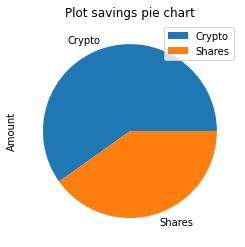

In [12]:
# Plot savings pie chart
df_savings.plot.pie( y="Amount", title="Plot savings pie chart") 

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings= crypto + shares
gap = total_savings -  emergency_fund

# Validate saving health
if total_savings > emergency_fund:
    print(f"Congratulations you have enough money in your funds")
elif total_savings == emergency_fund:
    print(f"Congratulations you have reach your financial goal")
elif total_savings < emergency_funds:
    print(f"Sorry, you are ${gap} away from your goal")

Congratulations you have enough money in your funds


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
tickers = ["SPY", "AGG"]
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df
# Display sample data
df_stock_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                              SPY                                       
                             open    high     low    close      volume  
time                                                                    
2017-05-10 00:00:00-04:00     NaN     NaN     NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410  45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030  35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245  42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100  37206183.0

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return() 

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\sdjac\Financial-Planning\Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992086,1.006895,1.000834,1.011499,0.999646,0.992093,1.016193,0.995825,0.999573,0.999198,...,0.987355,0.990440,1.008479,1.011366,1.004551,1.018086,0.980938,1.003082,1.009496,0.995658
2,1.000636,1.002388,0.995526,1.004398,0.996662,0.992458,1.011381,0.984182,1.005229,0.996972,...,0.985367,0.980873,1.007566,1.015926,1.015980,1.014069,0.978074,1.006230,1.007235,0.995564
3,1.004319,1.001444,0.995559,1.012493,0.994895,0.997277,1.011745,0.976694,0.999960,0.996046,...,0.991504,0.981037,1.012336,1.024584,1.000979,1.001966,0.967970,1.014507,1.003289,0.981700
4,1.008203,1.003855,0.994689,1.019013,0.984796,0.992523,1.005180,0.978862,1.003190,0.998886,...,0.997442,0.986651,1.020262,1.025963,0.998015,0.991829,0.964981,1.015049,1.011119,0.981223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,26.077861,20.719697,36.973716,23.674855,24.752071,6.554726,57.357060,30.233145,23.715896,28.645144,...,9.703802,15.616783,15.807324,11.077785,9.220226,13.042284,32.315369,26.257286,14.193108,3.203850
7557,25.947868,20.528174,36.891041,23.822257,24.831605,6.630859,56.761620,30.366669,23.664742,28.646902,...,9.645381,15.694170,15.540062,11.029062,9.216336,13.249273,32.064288,26.213358,14.209619,3.245459
7558,26.152790,20.800506,36.548816,23.501242,24.616283,6.591624,57.116220,30.494522,23.467632,28.344567,...,9.692616,15.748830,15.656187,10.940631,9.244891,13.113797,32.325454,26.027438,14.270827,3.265327
7559,26.253152,20.666331,36.675011,23.314283,24.656044,6.483821,56.754565,30.376327,23.639475,28.484596,...,9.674938,15.703949,15.819949,10.929175,9.216092,13.146666,32.755326,25.984365,14.284600,3.317486


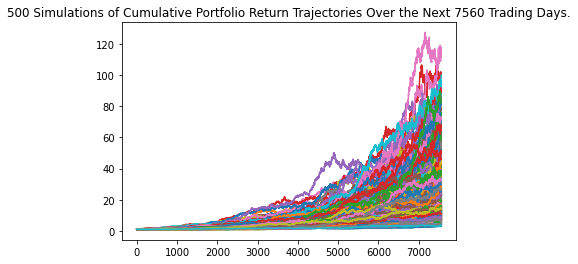

In [19]:
# Plot simulation outcomes
line_plot_thirty = MC_thirty_year.plot_simulation()

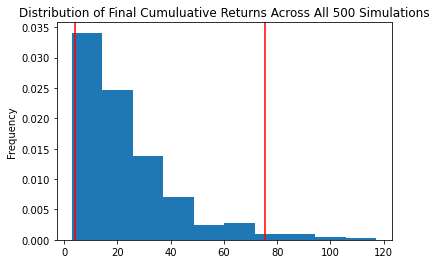

In [20]:
# Plot probability distribution and confidence intervals
dist_plot_thirty = MC_thirty_year.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
thirty_years_summary  = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(thirty_years_summary)

count           500.000000
mean             23.816740
std              18.772420
min               2.880818
25%              11.225999
50%              18.560519
75%              29.366657
max             117.228057
95% CI Lower      4.206129
95% CI Upper     75.426301
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000 

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(thirty_years_summary[8]*20000,2)
ci_upper = round(thirty_years_summary[9]*20000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $84122.57 and $1508526.03


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(thirty_years_summary[8]*30000,2)
ci_upper = round(thirty_years_summary[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $100000 in the portfolio over the next 30 years will end within in the range of $126183.86 and $2262789.04


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return() 

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\sdjac\Financial-Planning\Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006408,1.005553,1.001958,1.001719,1.012904,0.993215,1.000443,1.001691,1.019345,1.012960,...,0.986244,0.997590,0.993788,1.002747,1.007361,1.014072,1.009567,1.007215,1.001041,1.003645
2,1.018999,1.013036,1.000474,0.999993,1.010186,0.999509,1.001168,1.007714,1.028146,1.018234,...,0.969796,1.007267,0.994268,1.004516,1.000299,1.017095,1.017072,1.018338,0.997632,0.991642
3,1.018093,1.017893,1.004192,0.993784,1.025242,1.001127,0.992683,1.004460,1.029970,1.029545,...,0.975878,1.001636,0.994941,0.996378,0.989259,1.012630,1.021867,1.020974,0.994635,0.995503
4,1.033324,1.027019,1.010875,0.988000,1.013852,0.993451,0.991264,0.999812,1.033107,1.025153,...,0.977585,1.014305,0.997685,1.000816,0.990619,1.015408,1.022148,1.027155,1.003655,0.979422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.247412,3.034947,1.688547,1.675070,0.931176,2.393133,1.226548,1.669798,1.976148,1.174612,...,1.523636,0.968011,2.064282,1.054612,1.263806,1.449704,2.546195,1.567030,1.547502,1.054155
1257,1.221560,3.014130,1.692479,1.664993,0.911248,2.390007,1.224971,1.667157,1.966391,1.182658,...,1.512022,0.972908,2.071580,1.055195,1.261672,1.448078,2.568348,1.575540,1.527829,1.055509
1258,1.229220,3.026297,1.705773,1.679998,0.903065,2.373346,1.237491,1.657230,1.983711,1.185381,...,1.488716,0.962240,2.040577,1.051123,1.271776,1.452048,2.588903,1.568355,1.507293,1.048918
1259,1.243643,3.028608,1.747633,1.673182,0.900410,2.368265,1.250797,1.648984,2.001348,1.185346,...,1.502196,0.970097,2.033967,1.049723,1.256761,1.442236,2.590792,1.564835,1.500318,1.060922


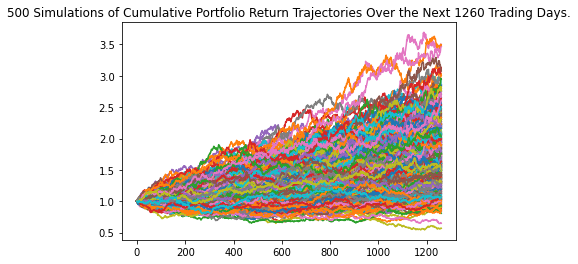

In [26]:
# Plot simulation outcomes
line_plot_five = MC_five_year.plot_simulation()

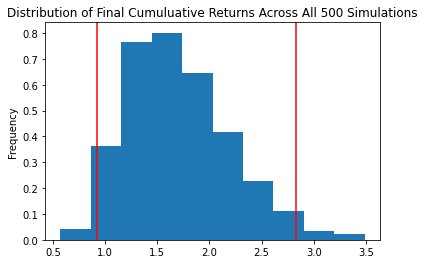

In [27]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_five_year.plot_distribution()


In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
five_years_summary = MC_five_year.summarize_cumulative_return()


# Print summary statistics
print(five_years_summary)

count           500.000000
mean              1.697727
std               0.493712
min               0.569771
25%               1.346254
50%               1.610361
75%               1.993966
max               3.489557
95% CI Lower      0.919002
95% CI Upper      2.829997
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(five_years_summary[8]*60000,2)
ci_upper_five = round(five_years_summary[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $55140.14 and $169799.82


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return() 

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\sdjac\Financial-Planning\Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.016390,1.004897,1.018299,1.005596,1.004191,0.999748,0.999106,1.000810,1.003825,0.995522,...,1.012909,1.001778,0.995688,0.984920,1.000820,0.998610,0.997332,1.000894,0.997767,0.995854
2,1.021592,1.001471,1.024616,0.997253,0.992728,1.002388,0.997528,0.993272,1.013638,0.997996,...,1.029739,1.000054,0.993810,0.970014,1.001184,1.006759,1.005400,1.009915,0.992643,0.992752
3,1.018597,1.006602,1.015342,0.995888,0.995680,1.010482,1.006339,0.989164,1.013422,1.004499,...,1.023277,0.998145,0.990316,0.963517,0.995386,1.000907,1.009133,1.008039,1.005549,0.977883
4,1.013304,1.004469,1.026375,0.987654,1.003065,1.019899,1.002273,0.988813,1.000777,1.003471,...,1.023320,0.999799,0.984536,0.962508,0.994999,1.004138,1.019626,1.001996,1.007035,0.969291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.424986,2.052530,1.057617,4.486734,1.361630,1.584566,3.641094,2.587935,1.395234,1.630918,...,4.276033,3.825512,2.462110,1.779177,1.739728,1.407631,2.205039,4.064267,1.818655,2.186688
2517,3.440926,2.057141,1.048005,4.471492,1.369725,1.605516,3.678292,2.580510,1.401124,1.629342,...,4.298072,3.835283,2.442131,1.783616,1.756449,1.404256,2.201838,4.106504,1.808336,2.173251
2518,3.474354,2.066390,1.051057,4.514955,1.358169,1.608072,3.705543,2.574698,1.406569,1.648315,...,4.324088,3.815086,2.445802,1.788132,1.755994,1.397047,2.184236,4.056152,1.800079,2.196721
2519,3.473383,2.054456,1.057544,4.484021,1.355110,1.602618,3.723759,2.565202,1.398313,1.624319,...,4.348026,3.792329,2.411341,1.786262,1.779689,1.387021,2.180297,4.022839,1.787782,2.199208


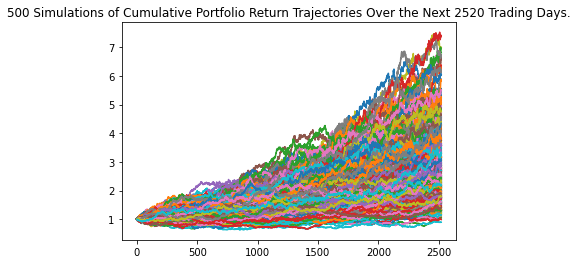

In [32]:
# Plot simulation outcomes
line_plot_ten = MC_ten_year.plot_simulation()

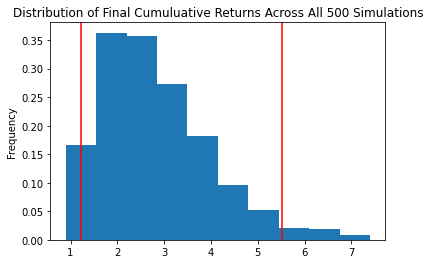

In [33]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_ten_year.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
ten_years_summary = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
print(ten_years_summary)

count           500.000000
mean              2.826635
std               1.173058
min               0.896752
25%               1.935889
50%               2.668997
75%               3.478265
max               7.398711
95% CI Lower      1.215224
95% CI Upper      5.528197
Name: 2520, dtype: float64


In [35]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(ten_years_summary[8]*60000,2)
ci_upper_ten = round(ten_years_summary[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $72913.43 and $331691.85
